<a href="https://colab.research.google.com/github/UtkarshsinghNN/Customer_segmentation_KMeans/blob/main/customer_segmentation_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the required libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Importing the dataset

In [17]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [18]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [22]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


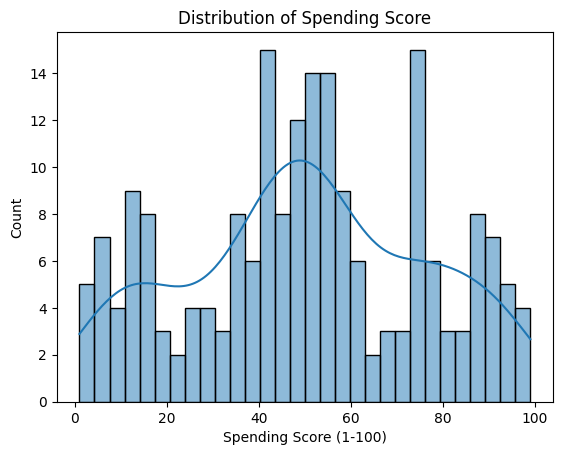

In [23]:
# Example: Distribution of Spending Score
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=30)
plt.title('Distribution of Spending Score')
plt.show()


In [30]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [31]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [38]:
inertia = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init = 'k-means++' ,random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

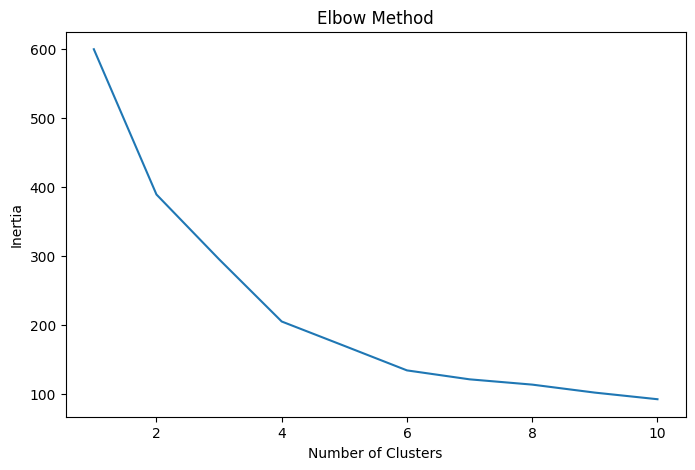

In [40]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

we can see elbow is lowest at 6 so we will take number of clusters to be 6

In [55]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = clusters


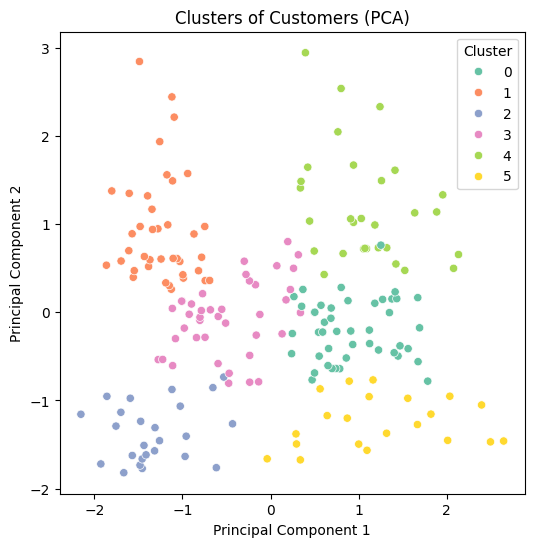

In [57]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Visualize clusters
plt.figure(figsize=(6, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster'], palette='Set2')
plt.title('Clusters of Customers (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [58]:
cluster_analysis = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_analysis)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        32.692308           86.538462               82.128205
2        25.560000           26.480000               76.240000
3        26.125000           59.425000               44.450000
4        44.000000           90.133333               17.933333
5        45.523810           26.285714               19.380952


<ipython-input-60-ded6ab42ef2a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette='Set2')


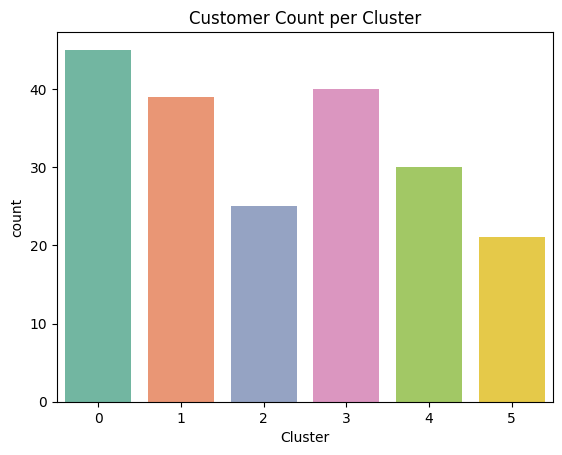

In [60]:
sns.countplot(x='Cluster', data=data, palette='Set2')
plt.title('Customer Count per Cluster')
plt.show()
